AdalegIt Presentaion by Jaime Hidalgo

In [91]:
import pandas as pd
import numpy
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Using the data from Spotify

In [6]:
spotify = r'C:\Users\jhmcf\Desktop\python\AdalegIt\spotify_dataset.csv'
data = pd.read_csv(spotify)
print(data.shape)
data.head()

(1556, 23)


Index  Highest Charting Position  Number of Times Charted  \
0      1                          1                        8   
1      2                          2                        3   
2      3                          1                       11   
3      4                          3                        5   
4      5                          5                        1   

  Week of Highest Charting                          Song Name     Streams  \
0   2021-07-23--2021-07-30                            Beggin'  48,633,449   
1   2021-07-23--2021-07-30          STAY (with Justin Bieber)  47,248,719   
2   2021-06-25--2021-07-02                           good 4 u  40,162,559   
3   2021-07-02--2021-07-09                         Bad Habits  37,799,456   
4   2021-07-23--2021-07-30  INDUSTRY BABY (feat. Jack Harlow)  33,948,454   

           Artist Artist Followers                 Song ID  \
0        Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   
1   The Kid LAROI          2230022  5HCyWlXZPP0y6Gqq8TgA20   
2  Olivia Rodrigo          6266514  4ZtFanR9U6ndgddUvNcjcG   
3      Ed Sheeran         83293380  6PQ88X9TkUIAUIZJHW2upE   
4       Lil Nas X          5473565  27NovPIUIRrOZoCHxABJwK   

                                    Genre  ... Danceability Energy Loudness  \
0  ['indie rock italiano', 'italian pop']  ...        0.714    0.8   -4.808   
1                  ['australian hip hop']  ...        0.591  0.764   -5.484   
2                                 ['pop']  ...        0.563  0.664   -5.044   
3                       ['pop', 'uk pop']  ...        0.808  0.897   -3.712   
4           ['lgbtq+ hip hop', 'pop rap']  ...        0.736  0.704   -7.409   

  Speechiness Acousticness Liveness    Tempo Duration (ms) Valence  Chord  
0      0.0504        0.127    0.359  134.002        211560   0.589      B  
1      0.0483       0.0383    0.103  169.928        141806   0.478  C#/Db  
2       0.154        0.335   0.0849  166.928        178147   0.688      A  
3      0.0348       0.0469    0.364  126.026        231041   0.591      B  
4      0.0615       0.0203   0.0501  149.995        212000   0.894  D#/Eb  

[5 rows x 23 columns]

Getting The information about the data set and see if we have NULL values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

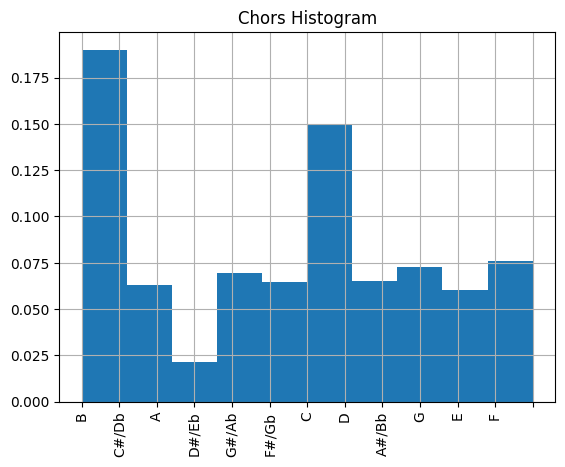

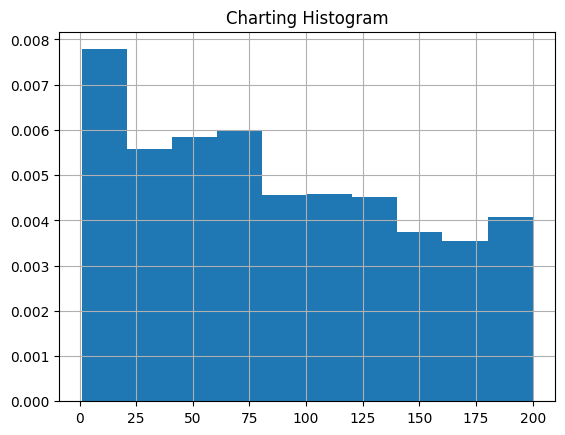

In [133]:

data['Chord'].hist(bins=10, density=True)
plt.title("Chors Histogram")
plt.xticks(rotation=90)
plt.show()

data['Highest Charting Position'].hist(bins=10,density=True)
plt.title("Charting Histogram")
plt.show()

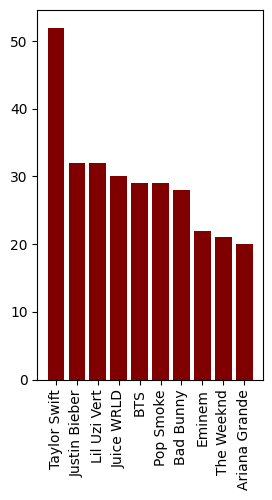

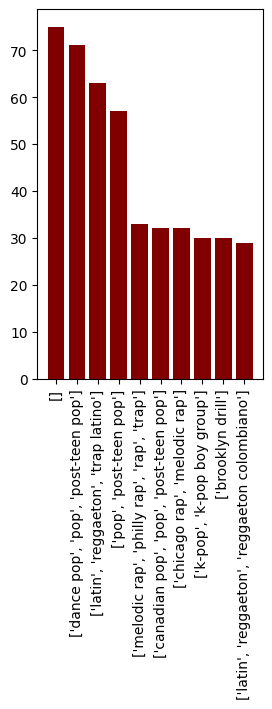

In [132]:
unique_artists = data['Artist'].unique()

counter = Counter(data['Artist'])

most_comon = counter.most_common(10)
x,y = zip(*most_comon)


plt.subplot(1,2,1)
plt.bar(x,y,color='maroon')
plt.xticks(rotation=90)
plt.show()

nique_artists = data['Genre'].unique()

counter = Counter(data['Genre'])

most_comon = counter.most_common(10)
x,y = zip(*most_comon)



plt.subplot(1,2,2)
plt.bar(x,y,color='maroon')
plt.xticks(rotation=90)
plt.show()


In [134]:
data.corr()

Index  Highest Charting Position  \
Index                      1.000000                   0.254341   
Highest Charting Position  0.254341                   1.000000   
Number of Times Charted   -0.359693                  -0.417968   

                           Number of Times Charted  
Index                                    -0.359693  
Highest Charting Position                -0.417968  
Number of Times Charted                   1.000000

      Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1551   1552                        195                        1   
1552   1553                        196                        1   
1553   1554                        197                        1   
1554   1555                        198                        1   
1555   1556                        199                        1   

     Week of Highest Charting                           Song Name     Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48,633,449   
1      2021-07-23--2021-07-30    

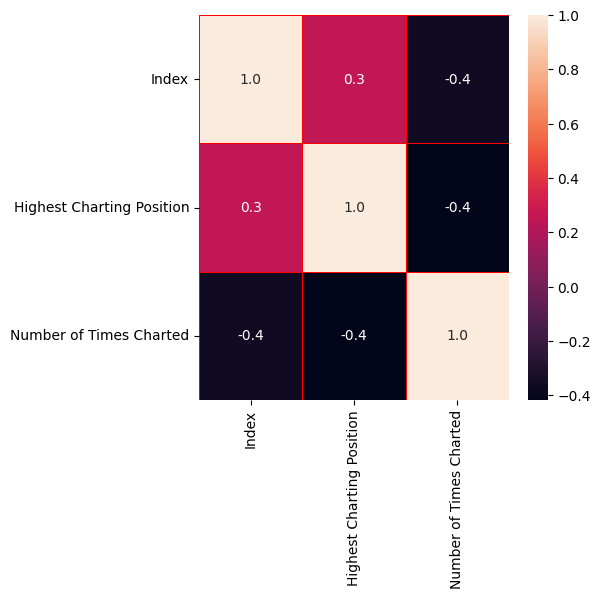

In [138]:
dataframe = pd.DataFrame(data)
print(dataframe)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(), annot=True,linewidths=0.5,linecolor="red",fmt='.1f',ax=ax)
plt.show()